# Assignment 3 - Linear regression

### The working of linear regression

Linear regression makes you able to predict a variable with the help of other variables

### Data preparings

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('data Mashable.csv')
df = df.sort_values(by='shares', ascending=False) # sort the data on highest shares
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918


In [35]:
df_subset = df[["n_tokens_title", "num_imgs", "is_weekend", "n_tokens_content", "num_videos"]] # choosing variables
df_subset # showing the subset

,n_tokens_title,num_imgs,is_weekend,n_tokens_content,num_videos
15508,12,15,0,688,1
16736,11,0,0,893,11
22572,13,1,0,2591,1
2022,9,0,0,134,2
8128,11,11,1,382,1
...,...,...,...,...,...
11058,9,1,0,650,0
14492,7,1,0,147,0
19729,9,0,0,106,0
20546,5,0,0,0,0


#### How I selected the variables:

I chose the variables to see which effect they would have on the amount of shares, amount of tokens in the title, number of images, number of videos, amount of words in the text and if it's the weekend or not.

#### Plots of the relation of your selected variables with the target

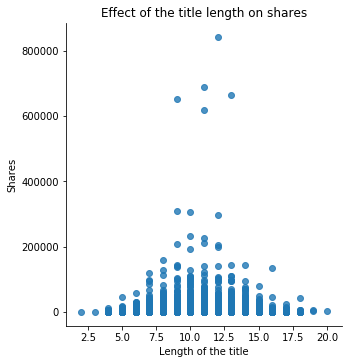

In [60]:
sns.lmplot(x='n_tokens_title', y='shares', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Length of the title')
plt.ylabel('Shares')
plt.title('Effect of the title length on shares')
plt.show()

You can see articles with an average title length are shared more often

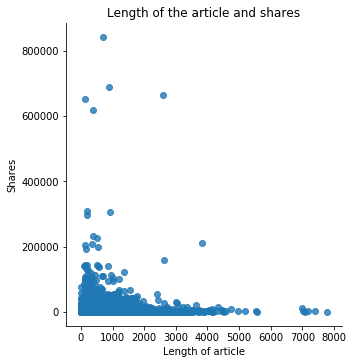

In [58]:
sns.lmplot(x='n_tokens_content', y='shares', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Length of article')
plt.ylabel('Shares')
plt.title('Length of the article and shares')
plt.show()

You see that shorter articles are shared more often, this could also be caused by the fact that there are more shorter articles. 

In [38]:
y = df['shares_log'] # Y is shares
X = df_subset # X is the other variables
X.index = df['url'] # shows the url of the text
X.head() # Shows the X

,n_tokens_title,num_imgs,is_weekend,n_tokens_content,num_videos
url,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,12,15,0,688,1
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,11,0,0,893,11
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,13,1,0,2591,1
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,9,0,0,134,2
http://mashable.com/2013/03/02/wealth-inequality/,11,11,1,382,1


### Training

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # split the data, store it into different variables
X_train.head() # the train data

,n_tokens_title,num_imgs,is_weekend,n_tokens_content,num_videos
url,,,,,
http://mashable.com/2013/10/17/randi-zuckerberg-book-dot/,10,1,0,323,0
http://mashable.com/2014/07/21/un-russia-malaysia-plane-crash/,9,3,0,832,0
http://mashable.com/2014/03/20/syria-goes-almost-completely-offline-again/,10,2,0,611,1
http://mashable.com/2013/02/21/facebook-voice-messages/,9,6,0,312,0
http://mashable.com/2013/10/19/apple-macbook-air-recall/,10,70,1,564,1


In [40]:
lm = LinearRegression() # create the model
model = lm.fit(X_train, y_train) # train the model

In [41]:
coef = pd.DataFrame(X.columns.values, lm.coef_) # this creates a df with a column with the column names, and the coefficients of the model
coef # show the coef

,0
-0.003736,n_tokens_title
0.003655,num_imgs
0.126871,is_weekend
-0.000004,n_tokens_content
0.003796,num_videos


In [42]:
y_test_p = lm.predict(X_test) # generate predictions for the test data
r2_score(y_test, y_test_p) # R2 prediction

0.02039366793155839

#### Predictive power of the model (R2, RMSE)

In [43]:
math.sqrt(mean_squared_error(y_test, y_test_p)) # RMSE

0.40896948058228516

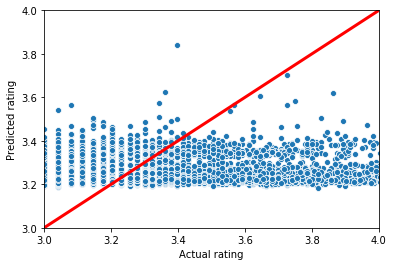

In [44]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating') # x label
plt.ylabel('Predicted rating') # y label
plt.xlim([3,4]) # forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,4])
plt.plot([3,4], [3, 4], color='red', lw=3) # plot a diagonal length
plt.show()

#### Equation of the model

In [45]:
lm.fit(X, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.25 + -0.00X
